# Speed benchmarks



## FastKDE is fast on 1D data

*BLUF: FastKDE lives up to its name on 1-D data, while CADE is slow*

We'll test some density estimators on the Bart Simpson density:

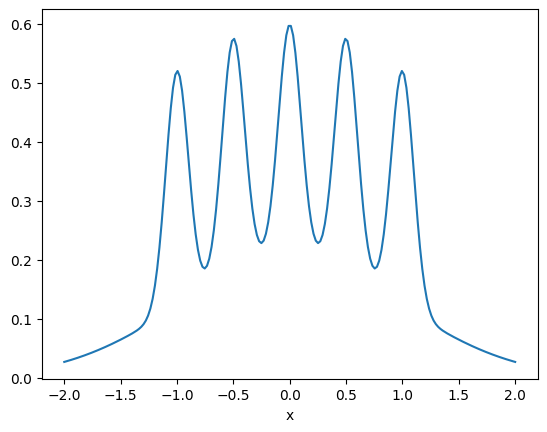

In [1]:
%matplotlib inline
from time import time

import pandas as pd

from empdens.cade import Cade
from empdens.simulators import BartSimpson
from empdens.wrappers.fast_kde import FastKDE
from empdens.wrappers.sklearn_isolation_forest import SklearnIsolationForest
from empdens.wrappers.sklearn_kde import SklearnKDE

bart_simpson = BartSimpson()
bart_simpson.plot()

Generate several samples of increasing size:

In [2]:
samples = [bart_simpson.rvs(n) for n in [100, 1000000]]

Execution time for training:

In [3]:
def time_train(df):
    estimators = {
        "CADE": Cade(sim_size=df.shape[0]),
        "FastKDE": FastKDE(),
        "SklearnKDE": SklearnKDE(),
        "IsolationForest": SklearnIsolationForest(),
    }
    times = {}
    for kind, estimator in estimators.items():
        t0 = time()
        estimator.train(df)
        times[kind] = time() - t0
    return times


results = [time_train(s) for s in samples]
rdf = pd.DataFrame(results)
rdf["sample_size"] = [s.shape[0] for s in samples]
rdf

,CADE,FastKDE,SklearnKDE,IsolationForest,sample_size
0,0.074917,0.051127,0.000270,0.047111,100
1,2.038690,0.213637,0.157793,0.431598,1000000


## Kernel density methods fail at  > 2D

TODO: test this claim

## CADE is fast on high-dimensional data

TODO: test this claim